In [1]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr")
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")

In [2]:
from simclrpy import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
train_loader_simclr = train_loader_simclr("CIFAR10",256)
test_loader = test_loader("CIFAR10",256)
test_images, test_labels = get_testimgs_list("CIFAR10")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
proj_dim = 64
model = SimClr('resnet50',proj_dim).cuda()
temperature = 0.5
#criterion = nt_xent_loss
criterion = SimCLR_Loss(256,0.5)
optimizer = "LARS"
model, train_loss = train_simclr(train_loader_simclr,model,criterion,optimizer,100,256,True,"/home/ky2446/saved-models/CIFAR10-RES50-SIMCLR-BS256-PD64-LARS")

/home/ky2446/simclr/simclr/optim/LARS.py:136: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272178570/work/torch/csrc/utils/python_arg_parser.cpp:1050.)
  next_v.mul_(momentum).add_(scaled_lr, grad)


Epoch: 0, step: 50/195, loss: 6.1759114265441895
Epoch: 0, step: 100/195, loss: 6.045299053192139
Epoch: 0, step: 150/195, loss: 5.966764450073242
Epoch: 0 completed, average loss: 6.050227368183625, time taken: 0.9208358367284138 mins
Epoch: 1, step: 50/195, loss: 5.702852249145508
Epoch: 1, step: 100/195, loss: 5.680123329162598
Epoch: 1, step: 150/195, loss: 5.650237083435059
Epoch: 1 completed, average loss: 5.698410721314259, time taken: 0.911276908715566 mins
Epoch: 2, step: 50/195, loss: 5.533379554748535
Epoch: 2, step: 100/195, loss: 5.453877925872803
Epoch: 2, step: 150/195, loss: 5.418070316314697
Epoch: 2 completed, average loss: 5.496395595257098, time taken: 0.9203875462214152 mins
Epoch: 3, step: 50/195, loss: 5.390974998474121
Epoch: 3, step: 100/195, loss: 5.3362884521484375
Epoch: 3, step: 150/195, loss: 5.319179058074951
Epoch: 3 completed, average loss: 5.368702172010373, time taken: 0.9214501976966858 mins
Epoch: 4, step: 50/195, loss: 5.31038761138916
Epoch: 4, st

Epoch: 34 completed, average loss: 4.870014613713973, time taken: 0.9202777504920959 mins
Epoch: 35, step: 50/195, loss: 4.8436408042907715
Epoch: 35, step: 100/195, loss: 4.862504959106445
Epoch: 35, step: 150/195, loss: 4.885584831237793
Epoch: 35 completed, average loss: 4.865789450131929, time taken: 0.9213879386583964 mins
Epoch: 36, step: 50/195, loss: 4.890684604644775
Epoch: 36, step: 100/195, loss: 4.863800048828125
Epoch: 36, step: 150/195, loss: 4.864719867706299
Epoch: 36 completed, average loss: 4.861241259941688, time taken: 0.9182669957478841 mins
Epoch: 37, step: 50/195, loss: 4.8641815185546875
Epoch: 37, step: 100/195, loss: 4.883340835571289
Epoch: 37, step: 150/195, loss: 4.861238479614258
Epoch: 37 completed, average loss: 4.857594225956843, time taken: 0.9120901068051656 mins
Epoch: 38, step: 50/195, loss: 4.819759368896484
Epoch: 38, step: 100/195, loss: 4.899165153503418
Epoch: 38, step: 150/195, loss: 4.858685493469238
Epoch: 38 completed, average loss: 4.85953

Epoch: 69, step: 50/195, loss: 4.720254898071289
Epoch: 69, step: 100/195, loss: 4.786959171295166
Epoch: 69, step: 150/195, loss: 4.777548313140869
Epoch: 69 completed, average loss: 4.800998154664651, time taken: 0.9151916384696961 mins
Epoch: 70, step: 50/195, loss: 4.810064315795898
Epoch: 70, step: 100/195, loss: 4.82944393157959
Epoch: 70, step: 150/195, loss: 4.836793899536133
Epoch: 70 completed, average loss: 4.795680591387627, time taken: 0.9203530510266622 mins
Epoch: 71, step: 50/195, loss: 4.810722827911377
Epoch: 71, step: 100/195, loss: 4.84805965423584
Epoch: 71, step: 150/195, loss: 4.8063178062438965
Epoch: 71 completed, average loss: 4.793817686423277, time taken: 0.9168379545211792 mins
Epoch: 72, step: 50/195, loss: 4.781257152557373
Epoch: 72, step: 100/195, loss: 4.811187744140625
Epoch: 72, step: 150/195, loss: 4.7842488288879395
Epoch: 72 completed, average loss: 4.797554094363481, time taken: 0.9190561056137085 mins
Epoch: 73, step: 50/195, loss: 4.82561922073

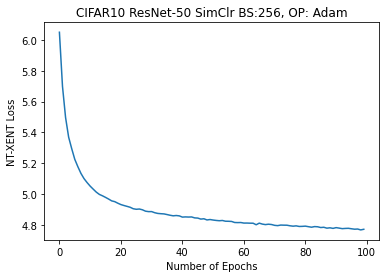

In [6]:
plt.xlabel("Number of Epochs")
plt.ylabel("NT-XENT Loss")
plt.title("CIFAR10 ResNet-50 SimClr BS:256, OP: Adam")
plt.plot(train_loss)
plt.savefig("/home/ky2446/figures/CIFAR10-RES50-SIMCLR-BS256-PD64-LARS.png")

In [7]:
with open("/home/ky2446/training-logs/CIFAR10-RES50-SIMCLR-BS256-PD64-LARS", "wb") as fp: 
    pickle.dump(train_loss, fp)